# データ・サイエンス	データ・サイエンス社会応用論 / ICT社会応用演習Ⅳ
## 9-2. 交通事故統計情報の分析（東京都内日次集計）

### 1. 下準備
#### 1-a) ライブラリのインポート

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import jpholiday
import japanize_matplotlib

#### 1-b) 交通事故統計情報の読み込み

In [57]:
df_accident1 = pd.read_csv('data/accident/honhyo_2019.csv', encoding='SHIFT-JIS')
df_accident2 = pd.read_csv('data/accident/honhyo_2020.csv', encoding='SHIFT-JIS')
df_accident3 = pd.read_csv('data/accident/honhyo_2021.csv', encoding='SHIFT-JIS')
df_accident = pd.concat([df_accident1, df_accident2, df_accident3])
df_accident['年月日'] = pd.to_datetime({
    'year' : df_accident['発生日時　　年'], 'month' : df_accident['発生日時　　月'], 
    'day' : df_accident['発生日時　　日']
})
df_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,431412959,1414947029,6,3,2018-12-28
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,425706029,1413039991,1,3,2019-01-06
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,424115557,1414158530,3,3,2018-12-18
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,425647051,1413100440,7,3,2019-01-05
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,425606992,1420518034,2,2,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305191,1,97,114,166,2,0,4,33410,0,0,...,1,2,2,2,2,261031432,1273909676,6,3,2021-12-10
305192,1,97,114,167,2,0,1,33410,0,0,...,2,2,2,4,2,260918133,1274003673,4,3,2021-12-15
305193,1,97,114,168,2,0,1,10070,0,0,...,2,2,2,4,2,261022159,1274124558,4,3,2021-12-22
305194,1,97,114,169,2,0,1,33410,0,0,...,0,2,0,4,2,260955144,1273944244,6,3,2021-12-24


#### 1-c) 東京都内の2019年1月1日以降のデータの抽出

In [58]:
df_accident_tokyo1 = df_accident[df_accident['都道府県コード'] == 30]
df_accident_tokyo1 = df_accident_tokyo1[df_accident_tokyo1['年月日'] >= datetime(2019, 12, 1)]
df_accident_tokyo1 = df_accident_tokyo1[df_accident_tokyo1['年月日'] <= datetime(2019, 12, 31)]

df_accident_tokyo1

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
348854,1,30,69,683,2,0,3,50290,1,0,...,2,2,2,4,2,354131967,1394055474,7,3,2019-12-07
348856,1,30,69,685,2,0,1,50140,2,0,...,2,2,2,4,2,354036463,1394031249,3,3,2019-12-03
348862,1,30,69,691,2,0,2,42720,2,0,...,2,2,2,4,4,353015420,1392851221,7,3,2019-12-14
348863,1,30,69,692,2,0,1,50300,2,0,...,2,2,2,4,2,354552574,1394548223,7,3,2019-12-14
348868,1,30,69,697,2,0,2,50150,1,0,...,2,2,2,4,2,354614229,1394141939,2,3,2019-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199117,1,30,877,170,2,0,1,20740,0,0,...,2,2,2,4,2,354038685,1391751647,2,3,2019-12-23
223197,1,30,69,431,2,0,1,50050,1,0,...,2,1,2,4,2,353534971,1394424740,1,3,2019-12-01
224619,1,30,670,171,2,0,1,30000,0,0,...,0,0,0,2,0,354820760,1394843917,7,3,2019-12-14
252331,1,30,435,120,2,0,1,30000,0,0,...,0,2,0,4,2,354217202,1394233070,5,3,2019-12-19


In [59]:
df_accident_tokyo2 = df_accident[df_accident['都道府県コード'] == 30]
df_accident_tokyo2 = df_accident_tokyo2[df_accident_tokyo2['年月日'] >= datetime(2019, 1, 1)]
df_accident_tokyo2 = df_accident_tokyo2[df_accident_tokyo2['年月日'] <= datetime(2019, 12, 31)]
df_accident_tokyo2 = df_accident_tokyo2[(df_accident_tokyo2["当事者種別（当事者A）"] == 51) | (df_accident_tokyo2["当事者種別（当事者B）"] == 51)]

df_accident_tokyo2


,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
2708,1,30,101,14,2,0,1,10110,0,0,...,0,0,0,2,0,354043064,1394525047,1,3,2019-01-27
2721,1,30,102,13,2,0,1,30000,0,0,...,0,2,0,4,2,354153133,1394520482,5,3,2019-01-24
2723,1,30,102,15,2,0,1,30000,0,0,...,0,2,0,4,2,354138220,1394539900,4,3,2019-01-30
2728,1,30,103,3,2,0,1,20070,0,0,...,0,2,0,4,2,354150931,1394616237,5,3,2019-01-10
2729,1,30,103,4,2,0,1,95000,0,0,...,0,2,0,4,2,354200970,1394644008,6,3,2019-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174374,1,30,877,144,2,0,1,20730,0,0,...,0,0,0,4,2,353950606,1391818750,6,3,2019-01-04
199270,1,30,882,272,2,0,1,30000,0,0,...,0,2,0,4,2,354521794,1391901696,2,3,2019-11-25
224619,1,30,670,171,2,0,1,30000,0,0,...,0,0,0,2,0,354820760,1394843917,7,3,2019-12-14
225145,1,30,883,395,2,0,1,30000,0,0,...,0,0,0,4,2,353954197,1392038055,3,3,2019-10-08


In [60]:
df_accident_tokyo = df_accident[df_accident['都道府県コード'] == 30]
df_accident_tokyo = df_accident_tokyo[df_accident_tokyo['年月日'] >= datetime(2019, 1, 1)]
#df_accident_tokyo = df_accident_tokyo[(df_accident_tokyo['当事者種別（当事者A）'] <= 51) & (df_accident_tokyo['当事者種別（当事者A）'] != 0) & (df_accident_tokyo['当事者種別（当事者B）'] <= 51) & (df_accident_tokyo['当事者種別（当事者B）'] != 0)]

df_accident_tokyo = df_accident_tokyo[
    ((df_accident_tokyo['当事者種別（当事者A）'].isin([1, 2, 7, 3, 4, 5, 11, 12, 17, 13, 14])) &
     (df_accident_tokyo['当事者種別（当事者B）'].isin([1, 2, 7, 3, 4, 5, 11, 12, 17, 13, 14])))
]

df_accident_tokyo

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
2634,1,30,69,1,1,1,0,50230,1,0,...,1,2,2,4,1,353942627,1394821836,5,3,2019-01-03
2664,1,30,69,31,2,0,4,42710,1,0,...,2,2,2,2,4,353730552,1393608760,3,1,2019-01-01
2666,1,30,69,33,2,0,4,50140,2,0,...,2,2,2,4,2,354006471,1393806616,3,1,2019-01-01
2667,1,30,69,34,2,0,6,50150,1,0,...,2,2,2,4,2,354129346,1394529542,5,3,2019-01-03
2668,1,30,69,35,2,0,2,42720,2,0,...,2,2,2,4,4,353017828,1392853612,7,3,2019-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278527,1,30,895,236,2,0,1,10500,0,0,...,2,2,2,4,2,354353867,1392754232,1,3,2021-12-19
278531,1,30,895,240,2,0,1,99000,0,0,...,2,2,2,4,2,354348326,1392811727,7,3,2021-11-06
278532,1,30,895,241,2,0,1,10250,0,0,...,2,2,2,4,2,354434177,1392948090,4,3,2021-12-01
278535,1,30,895,244,2,0,1,10660,0,0,...,2,2,2,2,4,354417159,1393000420,2,3,2021-12-27


#### 1-d) 日毎の集計

In [61]:
df_accident_tokyo_daily = df_accident_tokyo.groupby(['年月日'], as_index=False)[['死者数', '負傷者数']].sum()
df_accident_tokyo_daily

,年月日,死者数,負傷者数
0,2019-01-01,0,48
1,2019-01-02,0,23
2,2019-01-03,1,36
3,2019-01-04,0,26
4,2019-01-05,0,22
...,...,...,...
1091,2021-12-27,0,20
1092,2021-12-28,0,14
1093,2021-12-29,0,18
1094,2021-12-30,0,13


#### 1-e) 気象データの読み込み

In [62]:
df_weather = pd.read_csv('data/weather/weather_tokyo.csv', encoding='SHIFT-JIS', header=2)
df_weather = df_weather.drop([0,1]).reset_index(drop=True)
df_weather['年月日'] = pd.to_datetime(df_weather['年月日'])
df_weather

,年月日,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時)
0,2019-01-01,10.7,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.3,晴,快晴
1,2019-01-02,10.9,2.2,0.0,1,0.0,1,0.0,1,8.7,0,2.9,快晴,快晴
2,2019-01-03,10.9,-0.3,0.0,1,0.0,1,0.0,1,8.9,0,3.1,快晴,快晴
3,2019-01-04,9.8,0.2,0.0,1,0.0,1,0.0,1,8.9,0,2.0,快晴,晴
4,2019-01-05,14.0,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.1,快晴,晴後一時曇
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,8.1,-2.2,0.0,1,0.0,1,0.0,1,8.5,0,2.0,快晴,快晴
1092,2021-12-28,9.5,-1.6,0.0,1,0.0,1,0.0,1,8.8,0,2.4,快晴,晴後曇
1093,2021-12-29,8.9,0.9,0.0,1,0.0,1,0.0,1,7.8,0,1.6,晴時々薄曇,晴一時曇
1094,2021-12-30,14.5,0.6,0.0,0,0.0,1,0.0,1,7.5,0,2.0,晴一時曇,晴


#### 1-f) 事故データと気象データの結合

In [63]:
df_accident_weather = pd.merge(df_accident_tokyo_daily, df_weather, on='年月日', how='right').fillna(0)
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時)
0,2019-01-01,0,48,10.7,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.3,晴,快晴
1,2019-01-02,0,23,10.9,2.2,0.0,1,0.0,1,0.0,1,8.7,0,2.9,快晴,快晴
2,2019-01-03,1,36,10.9,-0.3,0.0,1,0.0,1,0.0,1,8.9,0,3.1,快晴,快晴
3,2019-01-04,0,26,9.8,0.2,0.0,1,0.0,1,0.0,1,8.9,0,2.0,快晴,晴
4,2019-01-05,0,22,14.0,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.1,快晴,晴後一時曇
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,1,8.5,0,2.0,快晴,快晴
1092,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,1,8.8,0,2.4,快晴,晴後曇
1093,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,1,7.8,0,1.6,晴時々薄曇,晴一時曇
1094,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,1,7.5,0,2.0,晴一時曇,晴


#### 1-g) 曜日と祝日の追加

In [64]:
df_accident_weather['曜日'] = df_accident_weather['年月日'].dt.weekday
df_accident_weather['祝日'] = df_accident_weather['年月日'].dt.date.map(jpholiday.is_holiday).astype(int)
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日
0,2019-01-01,0,48,10.7,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.3,晴,快晴,1,1
1,2019-01-02,0,23,10.9,2.2,0.0,1,0.0,1,0.0,1,8.7,0,2.9,快晴,快晴,2,0
2,2019-01-03,1,36,10.9,-0.3,0.0,1,0.0,1,0.0,1,8.9,0,3.1,快晴,快晴,3,0
3,2019-01-04,0,26,9.8,0.2,0.0,1,0.0,1,0.0,1,8.9,0,2.0,快晴,晴,4,0
4,2019-01-05,0,22,14.0,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.1,快晴,晴後一時曇,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,1,8.5,0,2.0,快晴,快晴,0,0
1092,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,1,8.8,0,2.4,快晴,晴後曇,1,0
1093,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,1,7.8,0,1.6,晴時々薄曇,晴一時曇,2,0
1094,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,1,7.5,0,2.0,晴一時曇,晴,3,0


### 2. 負傷者数の可視化
#### 2-a) 負傷者数と死者数の推移の可視化

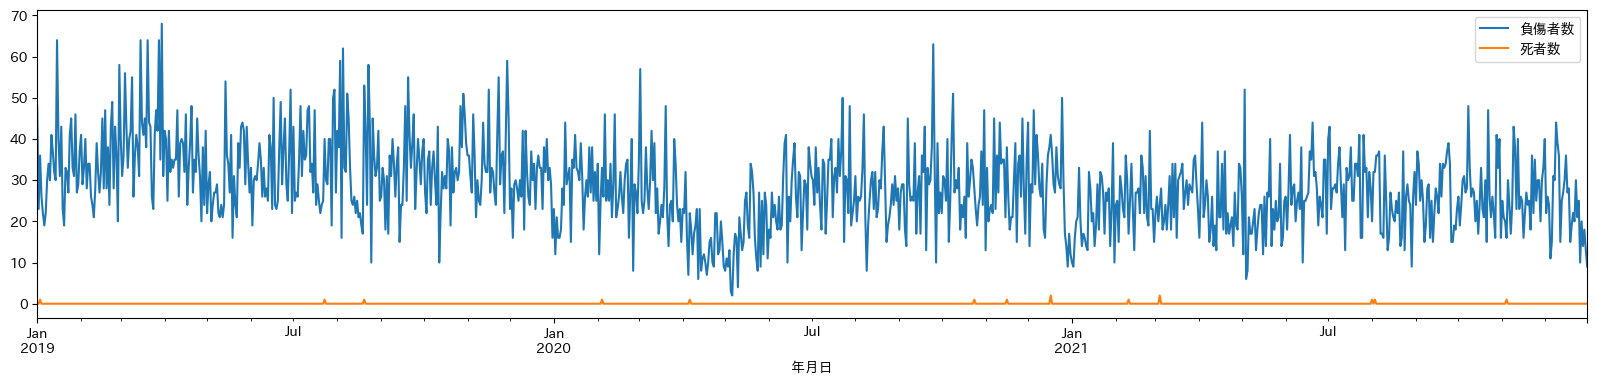

In [65]:
df_accident_weather.plot(x='年月日', y=['負傷者数', '死者数'], figsize=(20,4))
plt.show()

#### 2-b) 曜日と負傷者数の関係の可視化

In [66]:
df_accident_weather.groupby('曜日')['負傷者数'].describe()

,count,mean,std,min,25%,50%,75%,max
曜日,,,,,,,,
0,156.0,29.967949,9.426401,13.0,24.0,28.5,36.00,62.0
1,157.0,28.764331,10.507104,3.0,21.0,29.0,35.00,64.0
2,157.0,26.834395,8.760230,2.0,21.0,27.0,32.00,64.0
3,157.0,29.254777,9.381450,9.0,23.0,29.0,35.00,64.0
4,157.0,31.808917,10.362738,8.0,25.0,32.0,39.00,64.0
5,156.0,29.826923,10.493109,7.0,23.0,28.5,35.25,68.0
6,156.0,22.057692,8.369869,4.0,16.0,21.0,27.00,48.0


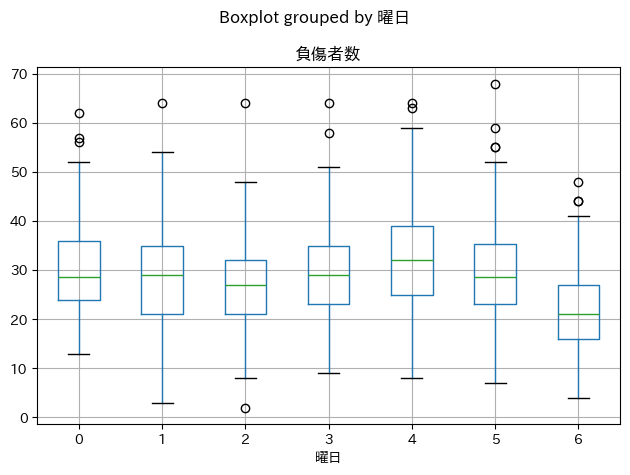

In [67]:
df_accident_weather.boxplot('負傷者数', '曜日')
plt.tight_layout()
plt.show()

#### 2-c) 過去1週間の移動平均の算出

In [68]:
df_accident_weather['負傷者数_移動平均'] = df_accident_weather['負傷者数'].rolling(7).mean()
df_accident_weather['死者数_移動平均'] = df_accident_weather['死者数'].rolling(7).mean()
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均
0,2019-01-01,0,48,10.7,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.3,晴,快晴,1,1,NaN,NaN
1,2019-01-02,0,23,10.9,2.2,0.0,1,0.0,1,0.0,1,8.7,0,2.9,快晴,快晴,2,0,NaN,NaN
2,2019-01-03,1,36,10.9,-0.3,0.0,1,0.0,1,0.0,1,8.9,0,3.1,快晴,快晴,3,0,NaN,NaN
3,2019-01-04,0,26,9.8,0.2,0.0,1,0.0,1,0.0,1,8.9,0,2.0,快晴,晴,4,0,NaN,NaN
4,2019-01-05,0,22,14.0,0.9,0.0,1,0.0,1,0.0,1,8.9,0,2.1,快晴,晴後一時曇,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,1,8.5,0,2.0,快晴,快晴,0,0,21.142857,0.0
1092,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,1,8.8,0,2.4,快晴,晴後曇,1,0,20.000000,0.0
1093,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,1,7.8,0,1.6,晴時々薄曇,晴一時曇,2,0,19.714286,0.0
1094,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,1,7.5,0,2.0,晴一時曇,晴,3,0,17.285714,0.0


#### 2-d) 負傷者数および死者数の移動平均の推移の可視化

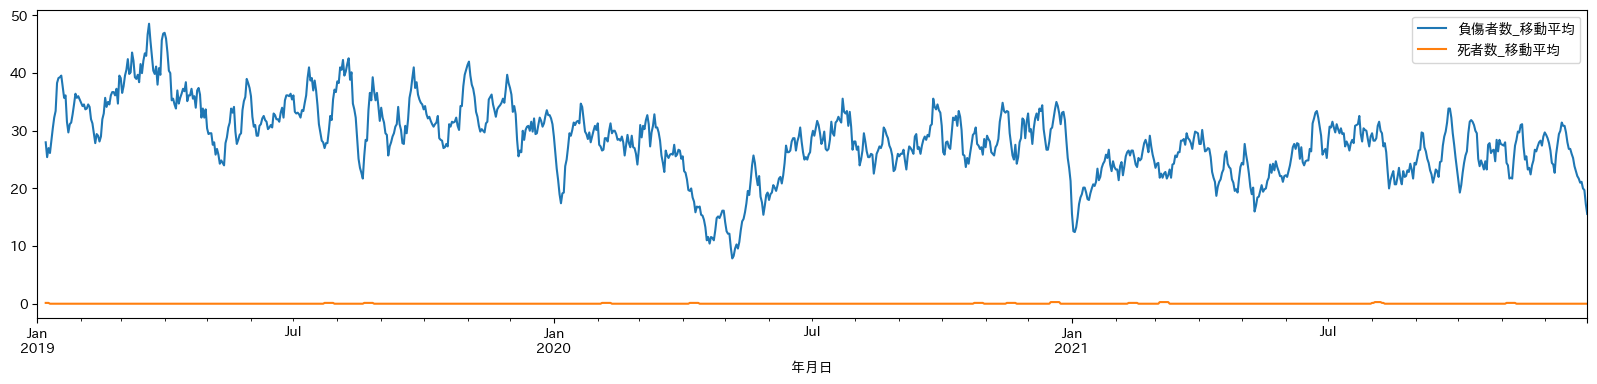

In [69]:
df_accident_weather.plot(x='年月日', y=['負傷者数_移動平均', '死者数_移動平均'], figsize=(20,4))
plt.show()

#### 2-e) 前年比の算出

In [70]:
df_accident_weather['前年'] = df_accident_weather['年月日'] - timedelta(days=365)
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),...,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均,前年
0,2019-01-01,0,48,10.7,0.9,0.0,1,0.0,1,0.0,...,8.9,0,2.3,晴,快晴,1,1,NaN,NaN,2018-01-01
1,2019-01-02,0,23,10.9,2.2,0.0,1,0.0,1,0.0,...,8.7,0,2.9,快晴,快晴,2,0,NaN,NaN,2018-01-02
2,2019-01-03,1,36,10.9,-0.3,0.0,1,0.0,1,0.0,...,8.9,0,3.1,快晴,快晴,3,0,NaN,NaN,2018-01-03
3,2019-01-04,0,26,9.8,0.2,0.0,1,0.0,1,0.0,...,8.9,0,2.0,快晴,晴,4,0,NaN,NaN,2018-01-04
4,2019-01-05,0,22,14.0,0.9,0.0,1,0.0,1,0.0,...,8.9,0,2.1,快晴,晴後一時曇,5,0,NaN,NaN,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,...,8.5,0,2.0,快晴,快晴,0,0,21.142857,0.0,2020-12-27
1092,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,...,8.8,0,2.4,快晴,晴後曇,1,0,20.000000,0.0,2020-12-28
1093,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,...,7.8,0,1.6,晴時々薄曇,晴一時曇,2,0,19.714286,0.0,2020-12-29
1094,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,...,7.5,0,2.0,晴一時曇,晴,3,0,17.285714,0.0,2020-12-30


In [71]:
df_tmp = df_accident_weather[['年月日', '負傷者数_移動平均']].rename(columns={
    '年月日' : '前年', '負傷者数_移動平均' : '前年_負傷者数_移動平均'
})
df_tmp

,前年,前年_負傷者数_移動平均
0,2019-01-01,NaN
1,2019-01-02,NaN
2,2019-01-03,NaN
3,2019-01-04,NaN
4,2019-01-05,NaN
...,...,...
1091,2021-12-27,21.142857
1092,2021-12-28,20.000000
1093,2021-12-29,19.714286
1094,2021-12-30,17.285714


In [72]:
df_accident_weather_compare = pd.merge(df_accident_weather, df_tmp, on='前年')
df_accident_weather_compare['負傷者数_前年比'] = df_accident_weather_compare['負傷者数_移動平均'] / df_accident_weather_compare['前年_負傷者数_移動平均']

df_accident_weather_compare

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),...,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均,前年,前年_負傷者数_移動平均,負傷者数_前年比
0,2020-01-01,0,23,10.2,3.2,0.0,1,0.0,1,0.0,...,2.6,晴,快晴,2,1,29.000000,0.0,2019-01-01,NaN,NaN
1,2020-01-02,0,12,11.3,1.9,0.0,1,0.0,1,0.0,...,1.8,晴一時曇,晴,3,0,26.142857,0.0,2019-01-02,NaN,NaN
2,2020-01-03,0,21,12.0,1.4,0.0,1,0.0,1,0.0,...,1.4,快晴,快晴,4,0,23.428571,0.0,2019-01-03,NaN,NaN
3,2020-01-04,0,16,12.2,3.6,0.0,0,0.0,1,0.0,...,2.3,曇時々晴,晴一時雨、みぞれを伴う,5,0,21.428571,0.0,2019-01-04,NaN,NaN
4,2020-01-05,0,16,10.2,0.6,1.0,0,0.0,1,0.0,...,3.0,快晴,快晴,6,0,19.000000,0.0,2019-01-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,...,2.0,快晴,快晴,0,0,21.142857,0.0,2020-12-27,31.857143,0.663677
727,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,...,2.4,快晴,晴後曇,1,0,20.000000,0.0,2020-12-28,28.428571,0.703518
728,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,...,1.6,晴時々薄曇,晴一時曇,2,0,19.714286,0.0,2020-12-29,25.285714,0.779661
729,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,...,2.0,晴一時曇,晴,3,0,17.285714,0.0,2020-12-30,23.571429,0.733333


#### 2-f) 前々年比の算出

In [73]:
df_accident_weather_compare['前々年'] = df_accident_weather_compare['年月日'] - timedelta(days=365 + 366)

df_tmp2 = df_accident_weather[['年月日', '負傷者数_移動平均']].rename(columns={
    '年月日' : '前々年', '負傷者数_移動平均' : '前々年_負傷者数_移動平均'
})

df_accident_weather_compare = pd.merge(df_accident_weather_compare, df_tmp2, on='前々年', how='left')
df_accident_weather_compare['負傷者数_前々年比'] = df_accident_weather_compare['負傷者数_移動平均'] / df_accident_weather_compare['前々年_負傷者数_移動平均']

df_accident_weather_compare

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),...,曜日,祝日,負傷者数_移動平均,死者数_移動平均,前年,前年_負傷者数_移動平均,負傷者数_前年比,前々年,前々年_負傷者数_移動平均,負傷者数_前々年比
0,2020-01-01,0,23,10.2,3.2,0.0,1,0.0,1,0.0,...,2,1,29.000000,0.0,2019-01-01,NaN,NaN,2017-12-31,NaN,NaN
1,2020-01-02,0,12,11.3,1.9,0.0,1,0.0,1,0.0,...,3,0,26.142857,0.0,2019-01-02,NaN,NaN,2018-01-01,NaN,NaN
2,2020-01-03,0,21,12.0,1.4,0.0,1,0.0,1,0.0,...,4,0,23.428571,0.0,2019-01-03,NaN,NaN,2018-01-02,NaN,NaN
3,2020-01-04,0,16,12.2,3.6,0.0,0,0.0,1,0.0,...,5,0,21.428571,0.0,2019-01-04,NaN,NaN,2018-01-03,NaN,NaN
4,2020-01-05,0,16,10.2,0.6,1.0,0,0.0,1,0.0,...,6,0,19.000000,0.0,2019-01-05,NaN,NaN,2018-01-04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,0,20,8.1,-2.2,0.0,1,0.0,1,0.0,...,0,0,21.142857,0.0,2020-12-27,31.857143,0.663677,2019-12-27,33.571429,0.629787
727,2021-12-28,0,14,9.5,-1.6,0.0,1,0.0,1,0.0,...,1,0,20.000000,0.0,2020-12-28,28.428571,0.703518,2019-12-28,32.714286,0.611354
728,2021-12-29,0,18,8.9,0.9,0.0,1,0.0,1,0.0,...,2,0,19.714286,0.0,2020-12-29,25.285714,0.779661,2019-12-29,32.714286,0.602620
729,2021-12-30,0,13,14.5,0.6,0.0,0,0.0,1,0.0,...,3,0,17.285714,0.0,2020-12-30,23.571429,0.733333,2019-12-30,32.142857,0.537778


#### 2-g) 負傷者数の前年・前々年比の推移（移動平均）

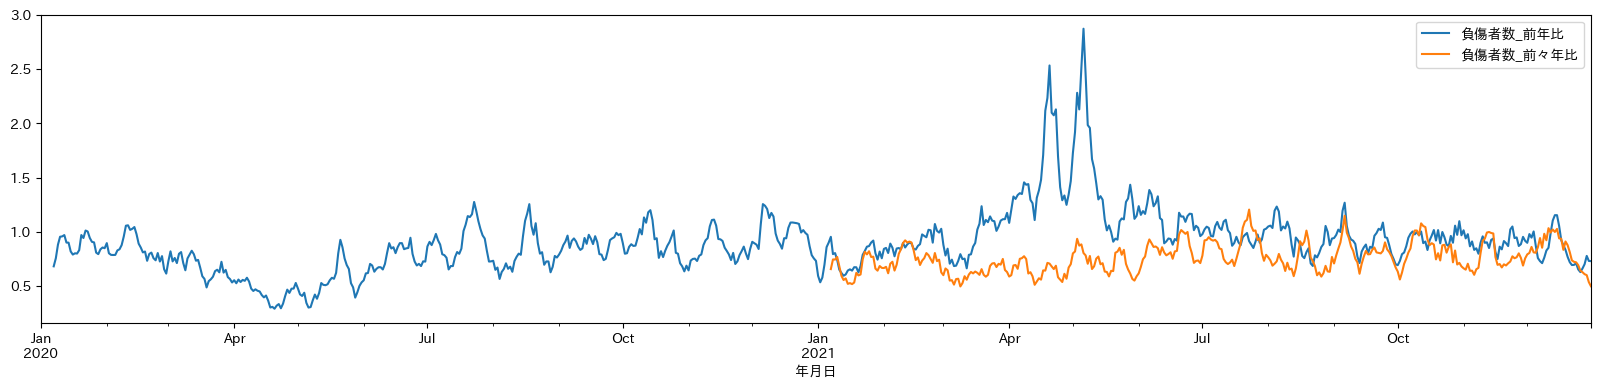

In [74]:
df_accident_weather_compare.plot(x='年月日', y=['負傷者数_前年比', '負傷者数_前々年比'], figsize=(20,4))
plt.show()

### 3. 気象データと組み合わせた分析
#### 3-a) データの絞り込み

In [75]:
df_accident_weather_2019 = df_accident_weather[df_accident_weather['年月日'] <= datetime(2019, 12, 31)]
df_accident_weather_2019

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),...,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均,前年
0,2019-01-01,0,48,10.7,0.9,0.0,1,0.0,1,0.0,...,8.9,0,2.3,晴,快晴,1,1,NaN,NaN,2018-01-01
1,2019-01-02,0,23,10.9,2.2,0.0,1,0.0,1,0.0,...,8.7,0,2.9,快晴,快晴,2,0,NaN,NaN,2018-01-02
2,2019-01-03,1,36,10.9,-0.3,0.0,1,0.0,1,0.0,...,8.9,0,3.1,快晴,快晴,3,0,NaN,NaN,2018-01-03
3,2019-01-04,0,26,9.8,0.2,0.0,1,0.0,1,0.0,...,8.9,0,2.0,快晴,晴,4,0,NaN,NaN,2018-01-04
4,2019-01-05,0,22,14.0,0.9,0.0,1,0.0,1,0.0,...,8.9,0,2.1,快晴,晴後一時曇,5,0,NaN,NaN,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0,40,13.7,4.5,0.5,0,0.0,1,0.0,...,6.5,0,4.0,晴,快晴,4,0,33.571429,0.0,2018-12-27
361,2019-12-28,0,30,10.9,3.8,0.0,1,0.0,1,0.0,...,8.8,0,3.5,快晴,晴一時曇,5,0,32.714286,0.0,2018-12-28
362,2019-12-29,0,33,10.9,2.2,0.0,1,0.0,1,0.0,...,8.3,0,1.9,晴後一時曇,曇,6,0,32.714286,0.0,2018-12-29
363,2019-12-30,0,29,8.8,5.1,0.5,0,0.0,1,0.0,...,0.0,0,1.8,雨時々曇,曇,0,0,32.142857,0.0,2018-12-30


#### 3-b) 降水量と負傷者数の関係

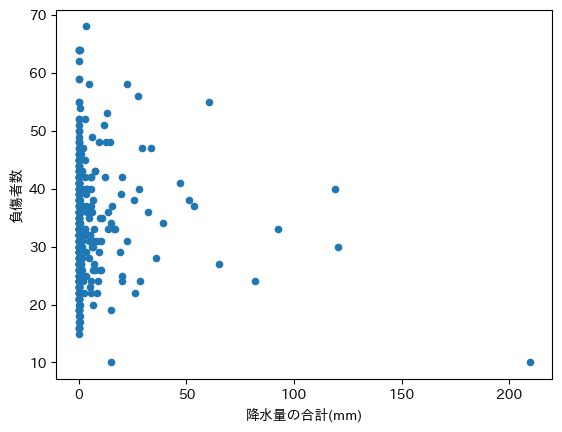

In [76]:
df_accident_weather_2019.plot.scatter('降水量の合計(mm)', '負傷者数')
plt.show()

In [77]:
df_accident_weather_2019[['降水量の合計(mm)', '負傷者数']].corr()

,降水量の合計(mm),負傷者数
降水量の合計(mm),1.000000,-0.038808
負傷者数,-0.038808,1.000000


#### 3-c) 降雨がない時の統計量の確認

In [78]:
df_accident_weather_norain = df_accident_weather_2019[df_accident_weather_2019['降水量の合計(mm)'] == 0]['負傷者数']
df_accident_weather_norain.describe()

count    234.000000
mean      33.572650
std        9.676143
min       15.000000
25%       27.000000
50%       33.000000
75%       40.000000
max       64.000000
Name: 負傷者数, dtype: float64

#### 3-d) 降雨がある時の統計量の確認

In [79]:
df_accident_weather_rain = df_accident_weather_2019[df_accident_weather_2019['降水量の合計(mm)'] > 0]['負傷者数']
df_accident_weather_rain.describe()

count    131.000000
mean      34.183206
std       10.287260
min       10.000000
25%       26.000000
50%       33.000000
75%       40.000000
max       68.000000
Name: 負傷者数, dtype: float64

In [80]:
df_accident_tokyo = df_accident[df_accident['都道府県コード'] == 13]
df_accident_tokyo = df_accident_tokyo[df_accident_tokyo['年月日'] >= datetime(2019, 12, 1)]
df_accident_tokyo = df_accident_tokyo[df_accident_tokyo['年月日'] <= datetime(2019, 12, 31)]

df_accident_tokyo

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
346883,1,13,401,213,2,0,1,39990,0,0,...,0,2,0,4,2,425922342,1442213513,5,3,2019-12-05
346891,1,13,401,221,2,0,1,380,0,41,...,2,2,2,4,2,430030955,1442144042,2,3,2019-12-09
346892,1,13,401,222,2,0,1,39990,0,0,...,2,2,2,4,2,430025731,1442324049,2,3,2019-12-09
346894,1,13,401,224,2,0,1,440,0,36,...,0,2,0,4,2,430033230,1442425166,1,3,2019-12-15
346896,1,13,401,226,2,0,1,11270,0,0,...,2,2,1,4,4,430104936,1442150561,1,3,2019-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28382,1,13,408,24,2,0,1,99000,0,0,...,0,2,0,4,2,425328167,1431202891,2,3,2019-12-30
28386,1,13,408,28,2,0,1,38880,0,0,...,2,2,2,4,2,425429760,1430254929,3,3,2019-12-24
28402,1,13,408,44,2,0,1,39990,0,0,...,0,2,0,2,0,425320758,1431201731,7,3,2019-12-28
28403,1,13,408,45,2,0,1,39990,0,0,...,2,2,2,4,2,425528984,1431110848,3,3,2019-12-17
